**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [1]:
import matplotlib.pyplot as plt
import numpy 
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import seaborn
seaborn.set_context('talk')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pd.read_csv('https://raw.githubusercontent.com/go2hmar/curacion/main/Curacion_Entregable2_parte1.csv')
melb_df[:3]

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Car_grouped,Rooms_grouped,zipcode,count,mean,std,min,max,median,mad
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,1969.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,1.0,2,3067.0,258,130.624031,115.267487,28,900,100.0,67.145965
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,0.0,2,3067.0,258,130.624031,115.267487,28,900,100.0,67.145965
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,0.0,3,3067.0,258,130.624031,115.267487,28,900,100.0,67.145965


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [3]:
categorical_cols = ['Type']
numerical_cols = ['Rooms']

In [4]:
melb_df[categorical_cols].nunique()

Type    3
dtype: int64

In [5]:
melb_df['Price'].nunique()

1908

In [6]:
# Check for nulls
melb_df[categorical_cols].isna().sum()

Type    0
dtype: int64

DESARROLLO EJERCICIO 1

In [7]:
# Revisamos el dataset obtenido en la primera parte
# (FALTA HACER:
#    en la siguiente línea, reemplazar melb_df por el dataset resultante de la 1ºparte del entregable, 
#    ej: 
#    dataset1 = daset_resultante_Entregable1.copy(deep=True)
# ) 
dataset1 = melb_df.copy(deep=True)
print ('Columnas del dataset del Entregable 1:')
print (dataset1.columns)

Columnas del dataset del Entregable 1:
Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'Car_grouped',
       'Rooms_grouped', 'zipcode', 'count', 'mean', 'std', 'min', 'max',
       'median', 'mad'],
      dtype='object')


In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#instanciar el encoder
# sobre los parámetros:
# - sparse=False: para obtener una matriz no dispersa
#cat_encoder = OneHotEncoder(sparse=False)
cat_encoder = OneHotEncoder(sparse=False)


In [9]:
# Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, EXCEPTO BuildingArea y YearBuilt
columnas = ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']
melb_dataset = dataset1[columnas].copy(deep=True)
print (melb_dataset.columns)


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')


In [10]:
# chequear valores nulos??
melb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10860 entries, 0 to 10859
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         10860 non-null  object 
 1   Address        10860 non-null  object 
 2   Rooms          10860 non-null  int64  
 3   Type           10860 non-null  object 
 4   Price          10860 non-null  float64
 5   Method         10860 non-null  object 
 6   SellerG        10860 non-null  object 
 7   Date           10860 non-null  object 
 8   Distance       10860 non-null  float64
 9   Postcode       10860 non-null  float64
 10  Bedroom2       10860 non-null  float64
 11  Bathroom       10860 non-null  float64
 12  Car            10860 non-null  float64
 13  Landsize       10860 non-null  float64
 14  CouncilArea    10860 non-null  object 
 15  Lattitude      10860 non-null  float64
 16  Longtitude     10860 non-null  float64
 17  Regionname     10860 non-null  object 
 18  Proper

In [11]:
# Revisamos la cantidad de categorías diferentes en algunas columnas

print ('Cantidad de categorías diferentes: en...')
print ('Suburb: ', melb_dataset['Suburb'].nunique())
# melb_dataset["Suburb"].value_counts()

print ('Rooms : ', melb_dataset['Rooms'].nunique())
# melb_dataset["Rooms"].value_counts()

print ('Regionname: ', melb_dataset['Regionname'].nunique())
# melb_dataset["Regionname"].value_counts()

print ('CouncilArea: ', melb_dataset['CouncilArea'].nunique())
#melb_dataset["CouncilArea"].value_counts()

print ('Landsize: ', melb_dataset['Landsize'].nunique())
#melb_dataset["Landsize"].value_counts()


Cantidad de categorías diferentes: en...
Suburb:  194
Rooms :  5
Regionname:  5
CouncilArea:  27
Landsize:  1324


In [12]:
## Clasificamos cada fila, por rango de Landsize
##  (se usará después para OneHotEncoding, pero no por valor sino por rango de valores de Landsize)
rango_Landsize = [0, 1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 440000, 460000]
melb_dataset['rango_Landsize'] = pd.cut(melb_dataset['Landsize'], rango_Landsize)
melb_dataset['rango_Landsize'].value_counts(sort=False)

(0, 1]                 2
(1, 100]             302
(100, 200]          1380
(200, 300]          1288
(300, 400]          1020
(400, 500]           817
(500, 600]          1128
(600, 700]          1399
(700, 800]           707
(800, 900]           303
(900, 1000]          145
(1000, 2000]         317
(2000, 3000]          86
(3000, 4000]          34
(4000, 5000]          29
(5000, 440000]        34
(440000, 460000]       0
Name: rango_Landsize, dtype: int64

In [13]:
# Categorías diferentes en la columna SUBURB
melb_dataset["Suburb"].value_counts()

Richmond              253
Bentleigh East        245
Preston               236
Brunswick             222
Essendon              216
South Yarra           191
Coburg                187
Northcote             184
Glen Iris             178
Hawthorn              177
Pascoe Vale           171
Yarraville            163
St Kilda              159
Glenroy               158
Brighton              156
Kew                   152
Balwyn North          150
Port Melbourne        149
Moonee Ponds          147
Carnegie              146
Thornbury             139
Newport               135
Bentleigh             133
Brighton East         133
Footscray             132
Elwood                129
Ascot Vale            127
Prahran               122
Hampton               119
Surrey Hills          117
Kensington            117
Camberwell            116
Malvern East          113
Doncaster             112
Sunshine              111
Brunswick West        109
Williamstown          106
Hawthorn East         106
West Footscr

In [14]:
columna=['Suburb']
# definimos un umbral para las categorías de la columna SUBURB
# umbral para las categorías de la columna: es la cantidad mínima de valores que tiene que tener cada categoría para ser considerada en la codificación
threshold_Suburb = 100
# contamos, por categoria
counts = melb_dataset[columna].value_counts()
# filtramos por el umbral
repl = counts[counts <= threshold_Suburb].index
# codificamos los filtrados solamente y al resto le ponemos "unmommon"
temp = pd.get_dummies(melb_dataset["Suburb"].replace(repl, 'uncommon'))
auxiliar = temp.add_prefix('Suburb_')
melb_dataset = melb_dataset.join(auxiliar)



In [15]:
# revisamos si se agregaron las columnas
melb_dataset.shape
# nota: vemos que de las 314 categorías diferentes, sólo se codificaron algunas

# revisamos los valores de las columnas agregadas
#auxiliarSuburb.head(5)
#melb_dataset.info()
melb_dataset.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,rango_Landsize,Suburb_Ascot Vale,Suburb_Balwyn North,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Brighton,Suburb_Brighton East,Suburb_Brunswick,Suburb_Brunswick West,Suburb_Camberwell,Suburb_Carnegie,Suburb_Coburg,Suburb_Doncaster,Suburb_Elwood,Suburb_Essendon,Suburb_Footscray,Suburb_Glen Iris,Suburb_Glenroy,Suburb_Hampton,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Kensington,Suburb_Kew,Suburb_Malvern East,Suburb_Moonee Ponds,Suburb_Newport,Suburb_Northcote,Suburb_Pascoe Vale,Suburb_Port Melbourne,Suburb_Prahran,Suburb_Preston,Suburb_Richmond,Suburb_South Yarra,Suburb_St Kilda,Suburb_Sunshine,Suburb_Surrey Hills,Suburb_Thornbury,Suburb_West Footscray,Suburb_Williamstown,Suburb_Yarraville,Suburb_uncommon
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,"(200, 300]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,"(100, 200]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,"(100, 200]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,"(1, 100]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,"(100, 200]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
# Categorías diferentes en la columna ROOMS
melb_dataset["Rooms"].value_counts()

3    4549
2    3329
4    1954
1     660
5     368
Name: Rooms, dtype: int64

In [17]:
columna=['Rooms']
counts=0
repl=0
temp=0
# definimos un umbral para las categorías de la columna ROOMS
# umbral para las categorías de la columna: es la cantidad mínima de valores que tiene que tener cada categoría para ser considerada en la codificación
threshold_Rooms = 70
# contamos, por categoria
counts = melb_dataset['Rooms'].value_counts()
# filtramos por el umbral
repl = counts[counts <= threshold_Rooms].index
# codificamos los filtrados solamente y al resto le ponemos unmommonSuburb
temp = pd.get_dummies(melb_dataset["Rooms"].replace(repl, 'uncommon'))
auxiliar = temp.add_prefix('Rooms_')
melb_dataset = melb_dataset.join(auxiliar)


In [18]:
# CONTROL
# revisamos si se agregaron las columnas
#melb_dataset.shape
# nota: vemos que de las 314 categorías diferentes, sólo se codificaron algunas

# revisamos los valores de las columnas agregadas
#melb_dataset.info()
#melb_dataset.head(5)

# revisamos los valores de las columnas agregadas
#melb_dataset.tail()

In [19]:
# Categorías diferentes en la columna REGIONNAME
melb_dataset["Regionname"].value_counts()

Southern Metropolitan         4252
Northern Metropolitan         2953
Western Metropolitan          2343
Eastern Metropolitan          1123
South-Eastern Metropolitan     189
Name: Regionname, dtype: int64

In [20]:
columna=['Regionname']
counts=0
repl=0
temp=0
# definimos un umbral para la cantidad de categorías de la columna Regionname
threshold_Regionname = 70
# contamos, por categoria
counts = melb_dataset['Regionname'].value_counts()
# filtramos por el umbral
repl = counts[counts <= threshold_Regionname].index
# codificamos los filtrados solamente y al resto le ponemos unmommonSuburb
temp = pd.get_dummies(melb_dataset["Regionname"].replace(repl, 'uncommon'))
auxiliar = temp.add_prefix('Regionname_')
melb_dataset = melb_dataset.join(auxiliar)


In [21]:
# revisamos si se agregaron las columnas
#melb_dataset.shape

# revisamos los valores de las columnas agregadas
#melb_dataset.info()
#melb_dataset.head(5)

# revisamos los valores de las columnas agregadas
#melb_dataset.tail()

In [22]:
# Categorías diferentes en la columna CouncilArea
melb_dataset["CouncilArea"].value_counts()

Moreland             2001
Boroondara            962
Glen Eira             835
Moonee Valley         728
Stonnington           666
Maribyrnong           642
Yarra                 631
Port Phillip          609
Darebin               602
Melbourne             464
Banyule               456
Bayside               444
Hobsons Bay           381
Brimbank              328
Whitehorse            291
Monash                274
Manningham            131
Kingston               85
Wyndham                83
Hume                   59
Maroondah              53
Greater Dandenong      45
Knox                   43
Nillumbik              26
Melton                 10
Whittlesea             10
Unavailable             1
Name: CouncilArea, dtype: int64

In [23]:
columna=['CouncilArea']
counts=0
repl=0
temp=0
# definimos un umbral para la cantidad de categorías de la columna CouncilArea
threshold_CouncilArea = 70
# contamos, por categoria
counts = melb_dataset['CouncilArea'].value_counts()
# filtramos por el umbral
repl = counts[counts <= threshold_CouncilArea].index
# codificamos los filtrados solamente y al resto le ponemos unmommonSuburb
temp = pd.get_dummies(melb_dataset["CouncilArea"].replace(repl, 'uncommon'))
auxiliar = temp.add_prefix('CouncilArea_')
melb_dataset = melb_dataset.join(auxiliar)


In [24]:
# CONTROL
# revisamos si se agregaron las columnas
#melb_dataset.shape

# revisamos los valores de las columnas agregadas
#auxiliarSuburb.head(5)
#melb_dataset.info()
#melb_dataset.head(5)

# revisamos los valores de las columnas agregadas
#melb_dataset.tail()

In [25]:
columna=['rango_Landsize']
counts=0
repl=0
temp=0
# definimos un umbral=1 para la cantidad de categorías de la columna rango_Landsize
#  es decir, para que las que tengan valores distintos de cero
threshold_Landsize = 1
# contamos, por categoria
counts = melb_dataset['rango_Landsize'].value_counts()
# filtramos por el umbral
repl = counts[counts <= threshold_Landsize].index
# codificamos los filtrados solamente y al resto le ponemos unmommonSuburb
temp = pd.get_dummies(melb_dataset["rango_Landsize"].replace(repl, 'uncommon'))
auxiliar = temp.add_prefix('rango_Landsize_')
melb_dataset = melb_dataset.join(auxiliar)


In [26]:
# revisamos si se agregaron las columnas
#melb_dataset.shape
# nota: vemos que de las 314 categorías diferentes, sólo se codificaron algunas
# revisamos los valores de las columnas agregadas
#auxiliarSuburb.head(5)
melb_dataset.info(verbose=True, null_counts=True)
melb_dataset.info()
#melb_dataset.head(5)

# revisamos los valores de las columnas agregadas
#melb_dataset.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10860 entries, 0 to 10859
Data columns (total 107 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Suburb                                 10860 non-null  object  
 1   Address                                10860 non-null  object  
 2   Rooms                                  10860 non-null  int64   
 3   Type                                   10860 non-null  object  
 4   Price                                  10860 non-null  float64 
 5   Method                                 10860 non-null  object  
 6   SellerG                                10860 non-null  object  
 7   Date                                   10860 non-null  object  
 8   Distance                               10860 non-null  float64 
 9   Postcode                               10860 non-null  float64 
 10  Bedroom2                               10860 non-null  fl

In [27]:
##PRUEBAS de OneHotEncoding de varias columnas simultáneamente...
## ( estas son pruebas que hicimos, pero todo quedo DESCARTADO)
 
##GET_DUMMIES
##Codificar con OneHotEncoding
#miscolumnas = ['Suburb', 'Rooms', 'Type', 'Landsize', 'CouncilArea', 'Regionname']
#####auxiliar = pd.get_dummies(melb_dataset, columns=miscolumnas, drop_first=True)
#melb_dataset = pd.get_dummies(melb_dataset, columns=miscolumnas)

##Unir la codificación al dataset
#melb_dataset = melb_dataset.join(auxiliar)

##Verificar las columnas agragadas
#melb_dataset.head(5)

##para la columna 'Rooms':
##Codificar con OneHotEncoding
#cat_encoder.fit(melb_dataset[['Rooms']])
#auxiliar = pd.get_dummies(melb_dataset['Rooms'], columns=['Rooms'], prefix=["Quantity of rooms"])
##Unir la codificación al dataset
#melb_dataset = melb_dataset.join(auxiliar)


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

##### CODIGO ORIGINAL QUE FIGURA EN EL ENUNCIADO

#melb_data_mice = melb_df.copy(deep=True)

#mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
#melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(melb_data_mice[['YearBuilt', 'BuildingArea']])

##Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.
#mice_year_built = melb_data_mice.YearBuilt.to_frame()
#mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
#melb_year_build = melb_df.YearBuilt.dropna().to_frame()
#melb_year_build['Imputation'] = 'Original'
#data = pandas.concat([mice_year_built, melb_year_build])
#fig = plt.figure(figsize=(8, 5))
#g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')


DESARROLLO EJERCICIO 2

In [29]:
# 1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.

columnasAgregadas = dataset1[['YearBuilt','BuildingArea']]
melb_dataset = melb_dataset.join(columnasAgregadas)
melb_dataset.tail()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,rango_Landsize,Suburb_Ascot Vale,Suburb_Balwyn North,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Brighton,Suburb_Brighton East,Suburb_Brunswick,Suburb_Brunswick West,Suburb_Camberwell,Suburb_Carnegie,Suburb_Coburg,Suburb_Doncaster,Suburb_Elwood,Suburb_Essendon,Suburb_Footscray,Suburb_Glen Iris,Suburb_Glenroy,Suburb_Hampton,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Kensington,Suburb_Kew,Suburb_Malvern East,Suburb_Moonee Ponds,Suburb_Newport,Suburb_Northcote,Suburb_Pascoe Vale,Suburb_Port Melbourne,Suburb_Prahran,Suburb_Preston,Suburb_Richmond,Suburb_South Yarra,Suburb_St Kilda,Suburb_Sunshine,Suburb_Surrey Hills,Suburb_Thornbury,Suburb_West Footscray,Suburb_Williamstown,Suburb_Yarraville,Suburb_uncommon,Rooms_1,Rooms_2,Rooms_3,Rooms_4,Rooms_5,Regionname_Eastern Metropolitan,Regionname_Northern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Darebin,CouncilArea_Glen Eira,CouncilArea_Hobsons Bay,CouncilArea_Kingston,CouncilArea_Manningham,CouncilArea_Maribyrnong,CouncilArea_Melbourne,CouncilArea_Monash,CouncilArea_Moonee Valley,CouncilArea_Moreland,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_uncommon,"rango_Landsize_(0, 1]","rango_Landsize_(1, 100]","rango_Landsize_(100, 200]","rango_Landsize_(200, 300]","rango_Landsize_(300, 400]","rango_Landsize_(400, 500]","rango_Landsize_(500, 600]","rango_Landsize_(600, 700]","rango_Landsize_(700, 800]","rango_Landsize_(800, 900]","rango_Landsize_(900, 1000]","rango_Landsize_(1000, 2000]","rango_Landsize_(2000, 3000]","rango_Landsize_(3000, 4000]","rango_Landsize_(4000, 5000]","rango_Landsize_(5000, 440000]",rango_Landsize_uncommon,YearBuilt,BuildingArea
10855,Noble Park,46 Jacana St,4,h,650000.0,S,C21,15/07/2017,22.7,3174.0,4.0,1.0,2.0,660.0,Greater Dandenong,-37.97918,145.18825,South-Eastern Metropolitan,11806.0,"(600, 700]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1969.0,NaN
10856,Noble Park,14 Mons Pde,3,h,752000.0,S,HAR,15/07/2017,22.7,3174.0,3.0,2.0,2.0,667.0,Greater Dandenong,-37.96814,145.17888,South-Eastern Metropolitan,11806.0,"(600, 700]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1969.0,NaN
10857,Noble Park,2/21 Marna Ct,2,u,445000.0,S,iSell,22/07/2017,22.7,3174.0,2.0,1.0,3.0,197.0,Greater Dandenong,-37.96903,145.18999,South-Eastern Metropolitan,11806.0,"(100, 200]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1998.0,82.0
10858,Noble Park,371 Princes Hwy,3,h,650000.0,SP,iSell,22/07/2017,22.7,3174.0,3.0,1.0,1.0,603.0,Greater Dandenong,-37.96318,145.18962,South-Eastern Metropolitan,11806.0,"(600, 700]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1970.0,130.0
10859,Noble Park,38 Dunblane Rd,3,h,695000.0,S,Barry,29/07/2017,22.7,3174.0,3.0,1.0,1.0,671.0,Greater Dandenong,-37.96200,145.18035,South-Eastern Metropolitan,11806.0,"(600, 700]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1950.0,142.0


In [30]:
# 2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. 
# ¿Es necesario estandarizar o escalar los datos previamente?

melb_dataset_original = melb_dataset.copy(deep=True)
# revisamos la proporción de valores nulos de las columnas YearBuilt y BuildingArea
melb_dataset[['YearBuilt','BuildingArea']].isnull().mean().sort_values(ascending=False)


BuildingArea    0.476796
YearBuilt       0.000000
dtype: float64

In [31]:
# exploración de valores de las columnas agregadas...
#
#print ('Cantidad de filas y columnas: ', melb_dataset.shape)
#print ()
#print ('Cantidad de valores nulos:')
#print (melb_dataset[['YearBuilt','BuildingArea']].isnull().sum())
#print ()
#print ('Resumen de las columnas:')
#melb_dataset[['YearBuilt','BuildingArea']].describe().T.round(2)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1faee1710>,
      dtype=object)

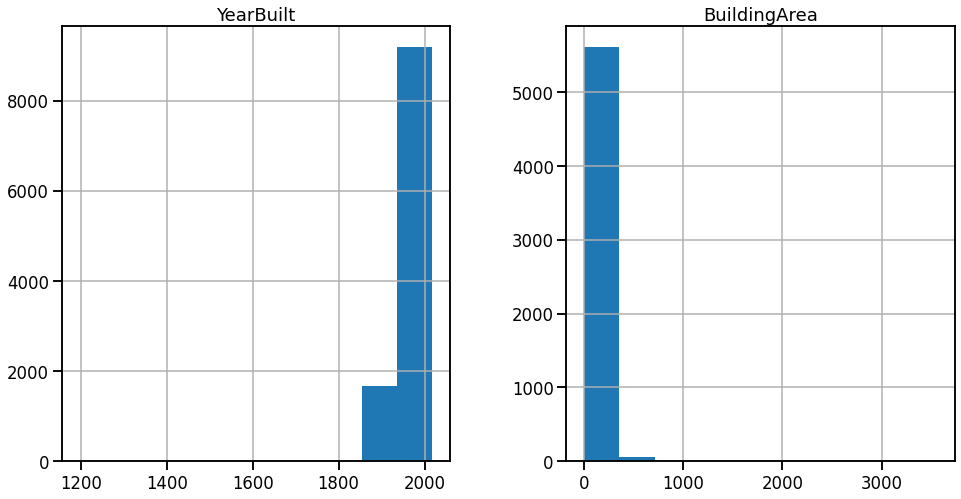

In [32]:
# (hay muchos valores nulos: en BuildingArea, casi la mitad; en YearBuilt, casi el 40%)

# Analizar la distribución de los valores de las columnas de interés
melb_dataset[['YearBuilt','BuildingArea']].hist(figsize=(16, 8))


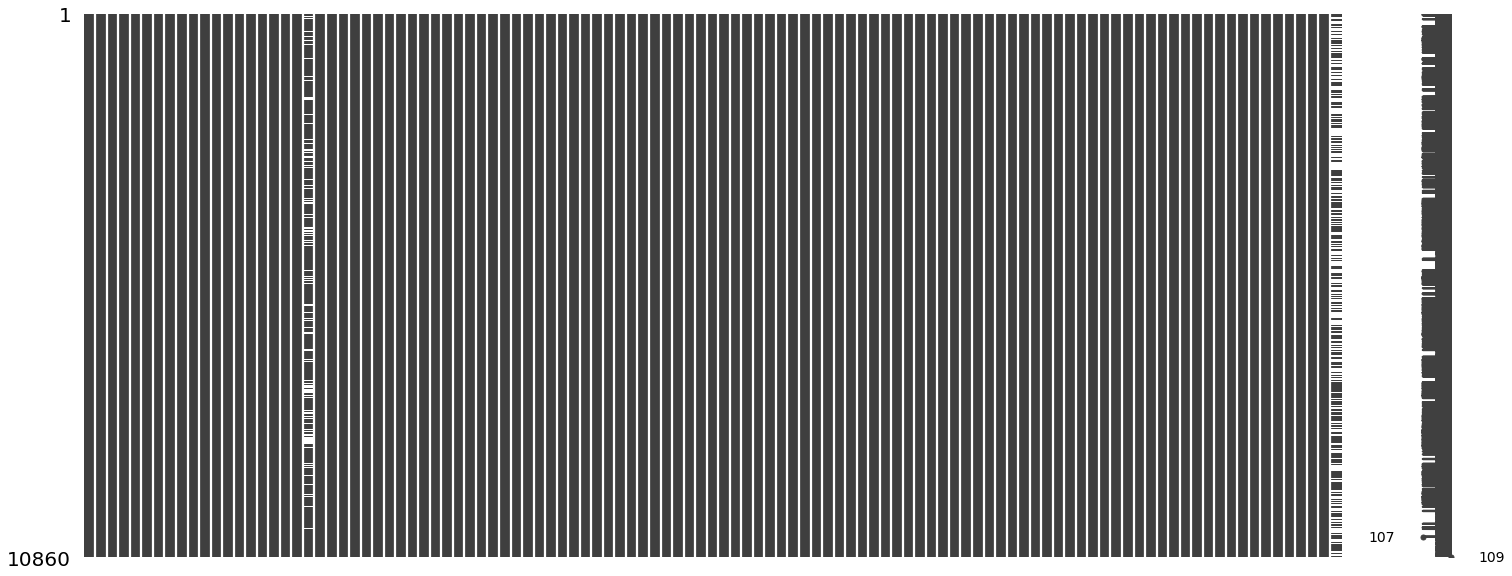

In [33]:
# graficamos la proporción de valores nulos de las columnas YearBuilt y BuildingArea
import missingno as msno  # # pip install missingno
# Plot correlation heatmap of missingness
msno.matrix(melb_dataset);


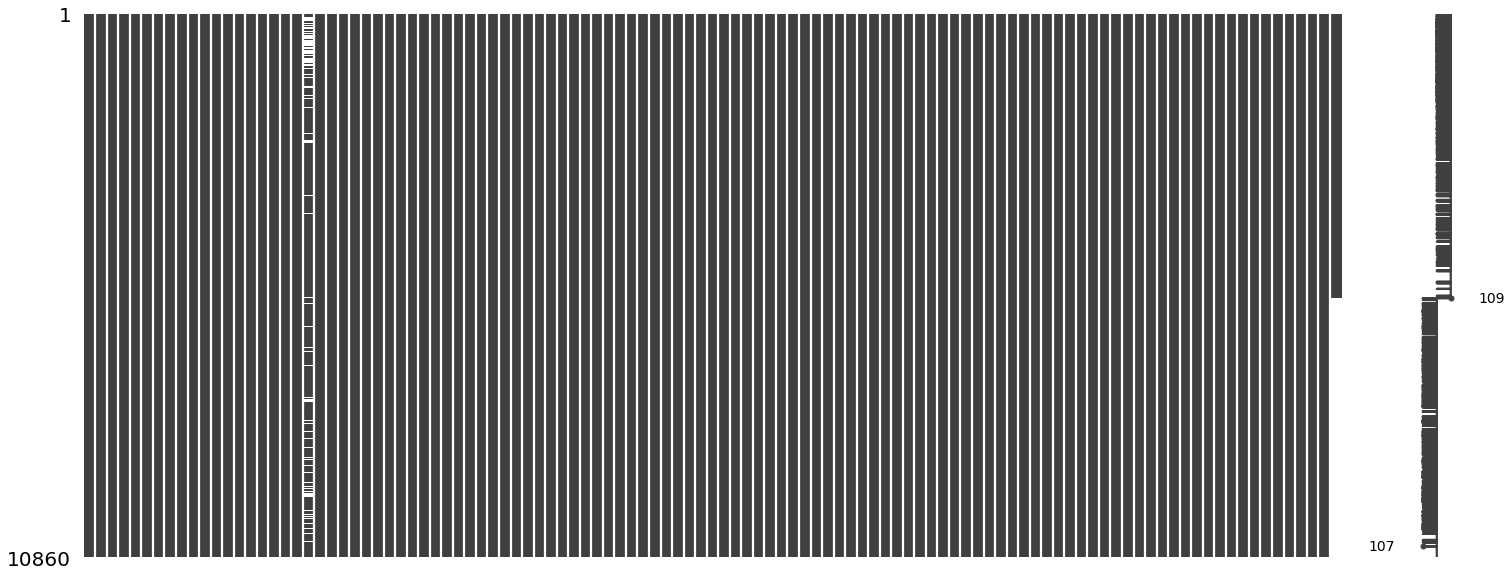

In [35]:
# en el gráfico anterior (heatmap) se ve que hay alta correlación entre  los valores faltantes de YearBuilt y BuildingArea

#ordenamos los valores para ver la correlación fuerte que hay entre 2 variables
#msno.matrix(melb_data_mice.sort_values("YearBuilt"));
msno.matrix(melb_dataset.sort_values("BuildingArea"));


In [36]:
# muestreamos el estado de algunas filas ANTES de imputar valores
melb_dataset.tail()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,rango_Landsize,Suburb_Ascot Vale,Suburb_Balwyn North,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Brighton,Suburb_Brighton East,Suburb_Brunswick,Suburb_Brunswick West,Suburb_Camberwell,Suburb_Carnegie,Suburb_Coburg,Suburb_Doncaster,Suburb_Elwood,Suburb_Essendon,Suburb_Footscray,Suburb_Glen Iris,Suburb_Glenroy,Suburb_Hampton,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Kensington,Suburb_Kew,Suburb_Malvern East,Suburb_Moonee Ponds,Suburb_Newport,Suburb_Northcote,Suburb_Pascoe Vale,Suburb_Port Melbourne,Suburb_Prahran,Suburb_Preston,Suburb_Richmond,Suburb_South Yarra,Suburb_St Kilda,Suburb_Sunshine,Suburb_Surrey Hills,Suburb_Thornbury,Suburb_West Footscray,Suburb_Williamstown,Suburb_Yarraville,Suburb_uncommon,Rooms_1,Rooms_2,Rooms_3,Rooms_4,Rooms_5,Regionname_Eastern Metropolitan,Regionname_Northern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Darebin,CouncilArea_Glen Eira,CouncilArea_Hobsons Bay,CouncilArea_Kingston,CouncilArea_Manningham,CouncilArea_Maribyrnong,CouncilArea_Melbourne,CouncilArea_Monash,CouncilArea_Moonee Valley,CouncilArea_Moreland,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_uncommon,"rango_Landsize_(0, 1]","rango_Landsize_(1, 100]","rango_Landsize_(100, 200]","rango_Landsize_(200, 300]","rango_Landsize_(300, 400]","rango_Landsize_(400, 500]","rango_Landsize_(500, 600]","rango_Landsize_(600, 700]","rango_Landsize_(700, 800]","rango_Landsize_(800, 900]","rango_Landsize_(900, 1000]","rango_Landsize_(1000, 2000]","rango_Landsize_(2000, 3000]","rango_Landsize_(3000, 4000]","rango_Landsize_(4000, 5000]","rango_Landsize_(5000, 440000]",rango_Landsize_uncommon,YearBuilt,BuildingArea
10855,Noble Park,46 Jacana St,4,h,650000.0,S,C21,15/07/2017,22.7,3174.0,4.0,1.0,2.0,660.0,Greater Dandenong,-37.97918,145.18825,South-Eastern Metropolitan,11806.0,"(600, 700]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1969.0,NaN
10856,Noble Park,14 Mons Pde,3,h,752000.0,S,HAR,15/07/2017,22.7,3174.0,3.0,2.0,2.0,667.0,Greater Dandenong,-37.96814,145.17888,South-Eastern Metropolitan,11806.0,"(600, 700]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1969.0,NaN
10857,Noble Park,2/21 Marna Ct,2,u,445000.0,S,iSell,22/07/2017,22.7,3174.0,2.0,1.0,3.0,197.0,Greater Dandenong,-37.96903,145.18999,South-Eastern Metropolitan,11806.0,"(100, 200]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1998.0,82.0
10858,Noble Park,371 Princes Hwy,3,h,650000.0,SP,iSell,22/07/2017,22.7,3174.0,3.0,1.0,1.0,603.0,Greater Dandenong,-37.96318,145.18962,South-Eastern Metropolitan,11806.0,"(600, 700]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1970.0,130.0
10859,Noble Park,38 Dunblane Rd,3,h,695000.0,S,Barry,29/07/2017,22.7,3174.0,3.0,1.0,1.0,671.0,Greater Dandenong,-37.96200,145.18035,South-Eastern Metropolitan,11806.0,"(600, 700]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1950.0,142.0


In [37]:
#melb_dataset.info()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.width', 200)

#print (melb_dataset.columns)
print (melb_dataset.columns.tolist())



['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'rango_Landsize', 'Suburb_Ascot Vale', 'Suburb_Balwyn North', 'Suburb_Bentleigh', 'Suburb_Bentleigh East', 'Suburb_Brighton', 'Suburb_Brighton East', 'Suburb_Brunswick', 'Suburb_Brunswick West', 'Suburb_Camberwell', 'Suburb_Carnegie', 'Suburb_Coburg', 'Suburb_Doncaster', 'Suburb_Elwood', 'Suburb_Essendon', 'Suburb_Footscray', 'Suburb_Glen Iris', 'Suburb_Glenroy', 'Suburb_Hampton', 'Suburb_Hawthorn', 'Suburb_Hawthorn East', 'Suburb_Kensington', 'Suburb_Kew', 'Suburb_Malvern East', 'Suburb_Moonee Ponds', 'Suburb_Newport', 'Suburb_Northcote', 'Suburb_Pascoe Vale', 'Suburb_Port Melbourne', 'Suburb_Prahran', 'Suburb_Preston', 'Suburb_Richmond', 'Suburb_South Yarra', 'Suburb_St Kilda', 'Suburb_Sunshine', 'Suburb_Surrey Hills', 'Suburb_Thornbury', 'Suburb_West Footscray', 'Suburb

In [38]:
# reindexamos el datastet, para prevenir errores que aparecen aleatoriamente más adelante
melb_dataset.reindex()

In [ ]:
# aplicamos KNN 

#instanciamos el imputador
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

nuevodataset = melb_dataset.copy(deep=True)

campos = ['Suburb_Ascot Vale', 'Suburb_Balwyn North', 'Suburb_Bentleigh', 'Suburb_Bentleigh East', 'Suburb_Brighton', 'Suburb_Brighton East', 'Suburb_Brunswick', 'Suburb_Brunswick West', 
                'Suburb_Camberwell', 'Suburb_Carnegie', 'Suburb_Coburg', 'Suburb_Doncaster', 'Suburb_Elwood', 'Suburb_Essendon', 'Suburb_Footscray', 'Suburb_Glen Iris', 'Suburb_Glenroy', 
                'Suburb_Hampton', 'Suburb_Hawthorn', 'Suburb_Hawthorn East', 'Suburb_Kensington', 'Suburb_Kew', 'Suburb_Malvern East', 'Suburb_Moonee Ponds', 'Suburb_Newport', 
                'Suburb_Northcote', 'Suburb_Pascoe Vale', 'Suburb_Port Melbourne', 'Suburb_Prahran', 'Suburb_Preston', 'Suburb_Richmond', 'Suburb_South Yarra', 'Suburb_St Kilda', 
                'Suburb_Sunshine', 'Suburb_Surrey Hills', 'Suburb_Thornbury', 'Suburb_West Footscray', 'Suburb_Williamstown', 'Suburb_Yarraville', 'Suburb_uncommon',
                'Rooms_1', 'Rooms_2', 'Rooms_3', 'Rooms_4', 'Rooms_5', 'Regionname_Eastern Metropolitan', 'Regionname_Northern Metropolitan', 'Regionname_South-Eastern Metropolitan', 'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan', 
                'CouncilArea_Banyule', 'CouncilArea_Bayside', 'CouncilArea_Boroondara', 'CouncilArea_Brimbank', 'CouncilArea_Darebin', 'CouncilArea_Glen Eira', 'CouncilArea_Hobsons Bay', 'CouncilArea_Kingston', 
                'CouncilArea_Manningham', 'CouncilArea_Maribyrnong', 'CouncilArea_Melbourne', 'CouncilArea_Monash', 'CouncilArea_Moonee Valley', 'CouncilArea_Moreland', 'CouncilArea_Port Phillip', 'CouncilArea_Stonnington', 
                'CouncilArea_Whitehorse', 'CouncilArea_Wyndham', 'CouncilArea_Yarra', 'CouncilArea_uncommon', 
                'rango_Landsize_(0, 1]', 'rango_Landsize_(1, 100]', 'rango_Landsize_(100, 200]', 'rango_Landsize_(200, 300]', 'rango_Landsize_(300, 400]', 'rango_Landsize_(400, 500]', 'rango_Landsize_(500, 600]', 
                'rango_Landsize_(600, 700]', 'rango_Landsize_(700, 800]', 'rango_Landsize_(800, 900]', 'rango_Landsize_(900, 1000]', 'rango_Landsize_(1000, 2000]', 'rango_Landsize_(2000, 3000]', 'rango_Landsize_(3000, 4000]', 
                'rango_Landsize_(4000, 5000]', 'rango_Landsize_(5000, 440000]', 'rango_Landsize_uncommon', 'YearBuilt', 'BuildingArea']
nuevodataset[campos] = mice_imputer.fit_transform(melb_dataset[campos])

# al ejecutar aparecen advertencias: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


In [ ]:
# OTRAS PRUEBAS:
## ( estas son pruebas que hicimos, pero todo quedo DESCARTADO)


#instaciamos el imputador
#mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

# aplicamos KNN en un solo paso, todas las columnas a la vez: se clava el Google Colab!

#estas dos sentencias son las que hacen clavar el Colab:
#todos_los_campos = ['Postcode','Suburb_Ascot Vale','Suburb_Balwyn','Suburb_Balwyn North','Suburb_Bentleigh','Suburb_Bentleigh East','Suburb_Brighton','Suburb_Brighton East','Suburb_Brunswick','Suburb_Brunswick West','Suburb_Camberwell','Suburb_Carnegie','Suburb_Coburg','Suburb_Doncaster','Suburb_Elwood','Suburb_Essendon','Suburb_Fawkner','Suburb_Footscray','Suburb_Glen Iris','Suburb_Glenroy','Suburb_Hampton','Suburb_Hawthorn','Suburb_Hawthorn East','Suburb_Keilor East','Suburb_Kensington','Suburb_Kew','Suburb_Malvern East','Suburb_Moonee Ponds','Suburb_Newport','Suburb_Northcote','Suburb_Pascoe Vale','Suburb_Port Melbourne','Suburb_Prahran','Suburb_Preston','Suburb_Reservoir','Suburb_Richmond','Suburb_South Yarra','Suburb_St Kilda','Suburb_Sunshine','Suburb_Surrey Hills','Suburb_Thornbury','Suburb_West Footscray','Suburb_Williamstown','Suburb_Yarraville','Suburb_uncommon','Rooms_1','Rooms_2','Rooms_3','Rooms_4','Rooms_5','Rooms_uncommon','Regionname_Eastern Metropolitan','Regionname_Northern Metropolitan','Regionname_South-Eastern Metropolitan','Regionname_Southern Metropolitan','Regionname_Western Metropolitan','Regionname_uncommon','CouncilArea_Banyule','CouncilArea_Bayside','CouncilArea_Boroondara','CouncilArea_Brimbank','CouncilArea_Darebin','CouncilArea_Glen Eira'
#                   ,'CouncilArea_Hobsons Bay','CouncilArea_Hume','CouncilArea_Kingston','CouncilArea_Knox','CouncilArea_Manningham','CouncilArea_Maribyrnong','CouncilArea_Maroondah','CouncilArea_Melbourne','CouncilArea_Monash','CouncilArea_Moonee Valley','CouncilArea_Moreland','CouncilArea_Port Phillip','CouncilArea_Stonnington','CouncilArea_Whitehorse','CouncilArea_Whittlesea','CouncilArea_Wyndham','CouncilArea_Yarra','CouncilArea_uncommon','rango_Landsize_(0, 1]','rango_Landsize_(1, 100]','rango_Landsize_(100, 200]','rango_Landsize_(200, 300]','rango_Landsize_(300, 400]','rango_Landsize_(400, 500]','rango_Landsize_(500, 600]','rango_Landsize_(600, 700]','rango_Landsize_(700, 800]','rango_Landsize_(800, 900]','rango_Landsize_(900, 1000]','rango_Landsize_(1000, 2000]','rango_Landsize_(2000, 3000]','rango_Landsize_(3000, 4000]'
#                   ,'rango_Landsize_(4000, 5000]','rango_Landsize_(5000, 440000]','rango_Landsize_uncommon','YearBuilt','BuildingArea']
#melb_dataset[todos_los_campos] = mice_imputer.fit_transform(melb_dataset[todos_los_campos])


In [ ]:
# MAS PRUEBAS REALIZADAS:
## ( estas son pruebas que hicimos, pero todo quedo DESCARTADO)

# Esto es otra cosa que probé para imputar con IterativeImputer con KNN:
#    copiar el dataset por columnas (dividir el dataset en 3 gupos de columnas) y aplicar KNN a TODAS LAS FILAS pero a ALGUNAS columnas y guardar el resultado en un DATASET aparte, para luego unirlos, 
#    pero da un error  "list indices must be integers or slices, not list"
#    y no funciona   

#campos_grupo1 = ['Postcode','YearBuilt','BuildingArea','Suburb_Ascot Vale','Suburb_Balwyn','Suburb_Balwyn North','Suburb_Bentleigh','Suburb_Bentleigh East','Suburb_Brighton','Suburb_Brighton East','Suburb_Brunswick'
#                    ,'Suburb_Brunswick West','Suburb_Camberwell','Suburb_Carnegie','Suburb_Coburg','Suburb_Doncaster','Suburb_Elwood','Suburb_Essendon','Suburb_Fawkner','Suburb_Footscray'
#                    ,'Suburb_Glen Iris','Suburb_Glenroy','Suburb_Hampton','Suburb_Hawthorn','Suburb_Hawthorn East','Suburb_Keilor East','Suburb_Kensington','Suburb_Kew','Suburb_Malvern East'
#                    ,'Suburb_Moonee Ponds','Suburb_Newport','Suburb_Northcote','Suburb_Pascoe Vale','Suburb_Port Melbourne','Suburb_Prahran','Suburb_Preston','Suburb_Reservoir','Suburb_Richmond'
#                    ,'Suburb_South Yarra','Suburb_St Kilda','Suburb_Sunshine','Suburb_Surrey Hills','Suburb_Thornbury','Suburb_West Footscray','Suburb_Williamstown','Suburb_Yarraville','Suburb_uncommon']
#columns_grupo1 = melb_dataset[campos_grupo1]
#nuevodataset_grupo1 = campos_grupo1.copy()
#nuevodataset_grupo1[campos_grupo1] = mice_imputer.fit_transform(melb_dataset[campos_grupo1])

#print (nuevodataset_grupo1.dtypes)


In [ ]:
melb_dataset = nuevodataset.copy(deep=True)
melb_dataset.reindex()

In [ ]:
#CONTROL 
# si queden valores nulos
print ('Valores nulos: ')  
print (melb_dataset.isnull().sum())

# estado de algunas filas DESPUES de imputar valores
#melb_dataset.loc[13570:13574] 
melb_dataset.tail()

In [ ]:
##Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.
mice_year_built = melb_dataset.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
mice_year_build = melb_dataset_original.YearBuilt.dropna().to_frame()
mice_year_build['Imputation'] = 'Original'
data = pd.concat([mice_year_built, mice_year_build])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [ ]:
n = min(20, melb_dataset.shape[0])
print (n)
print (melb_dataset.shape[0])
print (melb_dataset.shape[1])
print (melb_dataset.shape)

In [ ]:
# 1. Aplique PCA para obtener n componentes principales de la matriz, donde n = min(20, X.shape[0]). ¿Es necesario estandarizar o escalar los datos?

# Sí, es necesario escalar los datos, ya que PCA identifica aquellas direcciones en las que la varianza es mayor. 
#  Como la varianza de una variable se mide en su misma escala elevada al cuadrado, 
#  si antes de calcular las componentes no se estandarizan todas las variables para que tengan media 0 y desviación estándar 1, 
#  entonces aquellas variables cuya escala sea mayor dominarán al resto.


In [ ]:
dimensions4pca=['Suburb_Ascot Vale', 'Suburb_Balwyn North', 'Suburb_Bentleigh', 'Suburb_Bentleigh East', 'Suburb_Brighton', 'Suburb_Brighton East', 'Suburb_Brunswick', 'Suburb_Brunswick West', 
                'Suburb_Camberwell', 'Suburb_Carnegie', 'Suburb_Coburg', 'Suburb_Doncaster', 'Suburb_Elwood', 'Suburb_Essendon', 'Suburb_Footscray', 'Suburb_Glen Iris', 'Suburb_Glenroy', 
                'Suburb_Hampton', 'Suburb_Hawthorn', 'Suburb_Hawthorn East', 'Suburb_Kensington', 'Suburb_Kew', 'Suburb_Malvern East', 'Suburb_Moonee Ponds', 'Suburb_Newport', 
                'Suburb_Northcote', 'Suburb_Pascoe Vale', 'Suburb_Port Melbourne', 'Suburb_Prahran', 'Suburb_Preston', 'Suburb_Richmond', 'Suburb_South Yarra', 'Suburb_St Kilda', 
                'Suburb_Sunshine', 'Suburb_Surrey Hills', 'Suburb_Thornbury', 'Suburb_West Footscray', 'Suburb_Williamstown', 'Suburb_Yarraville', 'Suburb_uncommon',
                'Rooms_1', 'Rooms_2', 'Rooms_3', 'Rooms_4', 'Rooms_5', 'Regionname_Eastern Metropolitan', 'Regionname_Northern Metropolitan', 'Regionname_South-Eastern Metropolitan', 'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan', 
                'CouncilArea_Banyule', 'CouncilArea_Bayside', 'CouncilArea_Boroondara', 'CouncilArea_Brimbank', 'CouncilArea_Darebin', 'CouncilArea_Glen Eira', 'CouncilArea_Hobsons Bay', 'CouncilArea_Kingston', 
                'CouncilArea_Manningham', 'CouncilArea_Maribyrnong', 'CouncilArea_Melbourne', 'CouncilArea_Monash', 'CouncilArea_Moonee Valley', 'CouncilArea_Moreland', 'CouncilArea_Port Phillip', 'CouncilArea_Stonnington', 
                'CouncilArea_Whitehorse', 'CouncilArea_Wyndham', 'CouncilArea_Yarra', 'CouncilArea_uncommon', 
                'rango_Landsize_(0, 1]', 'rango_Landsize_(1, 100]', 'rango_Landsize_(100, 200]', 'rango_Landsize_(200, 300]', 'rango_Landsize_(300, 400]', 'rango_Landsize_(400, 500]', 'rango_Landsize_(500, 600]', 
                'rango_Landsize_(600, 700]', 'rango_Landsize_(700, 800]', 'rango_Landsize_(800, 900]', 'rango_Landsize_(900, 1000]', 'rango_Landsize_(1000, 2000]', 'rango_Landsize_(2000, 3000]', 'rango_Landsize_(3000, 4000]', 
                'rango_Landsize_(4000, 5000]', 'rango_Landsize_(5000, 440000]', 'rango_Landsize_uncommon', 'YearBuilt', 'BuildingArea']

#melb_dataset.loc[:,miscols].head(5)
df_4pca = melb_dataset.loc[:,dimensions4pca].copy(deep=True)

#Control
print ('Cantidad de dimensiones en el dataset original: ', df_4pca.shape)
print 
df_4pca.tail(5)

In [ ]:
# Controles: 
# si quedaron valores nulos 
numpy.isnan(df_4pca.any())
# si todos son valores finitos
numpy.isfinite(df_4pca.all())
# revisión de tipos de datos, por un "ValueError...for dtype('float64')" que se presenta
#df_4pca.dtypes


In [ ]:
# esta linea soluciona un error de
#   ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# que aparece al ejecutar más adelante al ejectuar la línea: 
#   pca_30.fit (df_4pca_scaled)
#
df_4pca =df_4pca[~df_4pca.isin([numpy.nan, numpy.inf, -numpy.inf]).any(1)]


In [ ]:
# Preprocesamiento para estandarizar las columnas

# instanciar el scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Entrenar: calcular el promedio y la desviación standard 
scaler.fit(df_4pca)
# Transformar los valores (estandarizarlos)
df_4pca_scaled = scaler.transform(df_4pca)


In [ ]:
# Control: 
# si quedaron valores nulos 
print ('hay nulos en dataset for pca df_4pca_scaled? ', numpy.isnan(df_4pca_scaled.any()))
# si todos son valores finitos
print ('son finitos los valores de dataset for pca df_4pca_scaled? ', numpy.isfinite(df_4pca_scaled.all()))

#  el dataset df_4pca_scaled tiene 110 columnas
#    df_4pca_scaled.shape
#  (13518, 110)

In [ ]:
from sklearn.decomposition import PCA
# Aplicamos PCA, para n=89, para obtener  componentes principales, es decir las todas las columnas del dataset)
myPComponents=89
#pca_110 = PCA(n_components=20, random_state=2020) # varianza explicada=0.4054
pca_myPComponents = PCA(n_components=myPComponents)
pca_myPComponents.fit (df_4pca_scaled)

In [ ]:
# 2. Grafique la varianza capturada por los primeros n componentes principales, para cada n.

print ('Varianza explicada para los 110 componentes principales: ',
                        sum(pca_myPComponents.explained_variance_ratio_ * 100))
print ()
#print ('Detalle de la varianza explicada por columnas ("Vector de varianzas"): ')
#print (pca_myPComponents.explained_variance_ratio_)

plt.plot (numpy.cumsum(pca_myPComponents.explained_variance_ratio_))
plt.xlabel('Cant.de componentes')
plt.ylabel('Varianza explicada (%)')
plt.savefig('elbow_plot.png')

In [ ]:
# del gráfico anterior se desprende que alrededor del 50 componentes explican alrededor del 80% de la varianza...

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pd.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

In [ ]:
df_4pca.head(10)

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```


#### (este punto está desarrollado en un documento aparte)